In [3]:
import os
import cv2 #pip install opencv-python
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

Welcome, today I am going to try and classify some images I found on kaggle to Identify landscape

If you wish to follow along you can download the data here

https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images

## Section 1: Looking at Training Images

In [6]:
training_path = r'C:\Users\brunolopez\mldata\landscape_recognition\Landscape Classification\Landscape Classification\Training Data'
testing_path = r'C:\Users\brunolopez\mldata\landscape_recognition\Landscape Classification\Landscape Classification\Testing Data'
val_path = r'C:\Users\brunolopez\mldata\landscape_recognition\Landscape Classification\Landscape Classification\Validation Data'

I am going to add a few helper functions that will make this task easier


In [7]:
directories = os.listdir(training_path)
directories

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

A couple of helper functions

In [8]:
def combo_list_dir():

    '''
    Helper function:
    List all of the files and subdirectories 3 x 5 = 15 total
    
    '''

    all_dir = []

    list_paths = [training_path, testing_path, val_path]

    for i in list_paths:
        for j in directories:
            all_dir.append(i + '\\' + j)

    return all_dir

def list_files(dir_list):
    '''
    List all of the individual images inside of the subdirectories
    
    '''

    all_files = []

    for subdir in dir_list:
        onlyfiles = [subdir + '\\' + f for f in listdir(subdir) if isfile(join(subdir, f))]
        all_files.append(onlyfiles)

    return all_files




In [9]:
sub_dirs = combo_list_dir()

In [10]:
#get all of the files, but they are in a nested list lets get rid of that
the_files = list_files(sub_dirs)

In [11]:
#Since the list above is nested lets flatten it so that we have all of the images
flat_list = [item for sublist in the_files for item in sublist]
flat_list[:5]

['C:\\Users\\brunolopez\\mldata\\landscape_recognition\\Landscape Classification\\Landscape Classification\\Training Data\\Coast\\Coast-Train (1).jpeg',
 'C:\\Users\\brunolopez\\mldata\\landscape_recognition\\Landscape Classification\\Landscape Classification\\Training Data\\Coast\\Coast-Train (10).jpeg',
 'C:\\Users\\brunolopez\\mldata\\landscape_recognition\\Landscape Classification\\Landscape Classification\\Training Data\\Coast\\Coast-Train (100).jpeg',
 'C:\\Users\\brunolopez\\mldata\\landscape_recognition\\Landscape Classification\\Landscape Classification\\Training Data\\Coast\\Coast-Train (1000).jpeg',
 'C:\\Users\\brunolopez\\mldata\\landscape_recognition\\Landscape Classification\\Landscape Classification\\Training Data\\Coast\\Coast-Train (1001).jpeg']

In [12]:
#These are the total number of samples
len(flat_list)

12000

Let's make a function that tells us the size of the image, if its training or validation, the url, and the classification

In [13]:
#test to see the file structure of the first file
the_test = flat_list[-1].split('\\')
the_test

['C:',
 'Users',
 'brunolopez',
 'mldata',
 'landscape_recognition',
 'Landscape Classification',
 'Landscape Classification',
 'Validation Data',
 'Mountain',
 'Mountain-Valid (99).jpeg']

In [14]:
def metadata_csv(flat_list):
    '''

    Creates a csv with the image size, training/test/validation, url and the classification

    Arguments: flat_list (list) : Output from the cell block above

    '''

    size_list = []
    category = []
    url = []
    test_tra_val = []

    for link in flat_list:
        split_link = link.split('\\')
        #let's define variables for our list parameters and then append them to avoid a mess
        the_cat = split_link[-2]
        the_type = split_link[-3]
        the_link = link
        #open the image and get the size
        open_img = Image.open(link)
        width, height = open_img.size

        #let's append to all of the lists
        size_list.append((width, height)) #width, height typle
        category.append(the_cat) #the category
        url.append(the_link) # the url
        test_tra_val.append(the_type) #whether the data is train, test, and validation


    metadata_dataset = pd.DataFrame({"size": size_list, "category" : category, "url" : url, "data_type" : test_tra_val})

    metadata_dataset.to_csv(r'C:\Users\brunolopez\mldata\landscape_recognition\metadata_images\image_metadata.csv')

    return metadata_dataset

In [15]:
#shows the size of the img and the catefory and type of training data
the_metadata = metadata_csv(flat_list)
the_metadata.head(10)

,size,category,url,data_type
0,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
1,"(300, 168)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
2,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
3,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
4,"(300, 168)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
5,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
6,"(373, 135)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
7,"(188, 268)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
8,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
9,"(300, 168)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data


Before we move on let's check the size of the first 100 images and see if they are the same size, otherwise we can use a fully connected cnn

In [16]:
def view_photos_and_size(list_images, num_images = 10):

    #Let us view the first 10 images

    #Initalize a counter for knowing which image we are on
    counter = 1
    for img in list_images[:num_images]:
        image = Image.open(img)
        width, height = image.size
        print('Image: ' + str(counter) , str(width), str(height))
        counter += 1
        display(image)
        #image.show()

        

Let's view some of these photos, kind of crazy. The photos are different sizes so it means we're going to use a ??? to try to tackle this classification problem

Image: 1 275 183


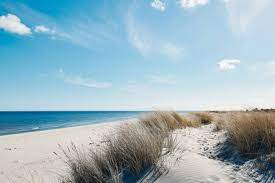

Image: 2 300 168


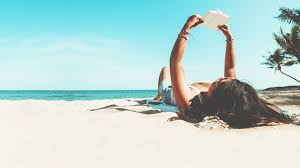

Image: 3 275 183


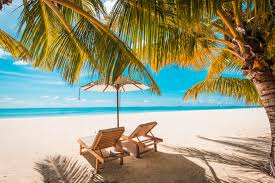

Image: 4 275 183


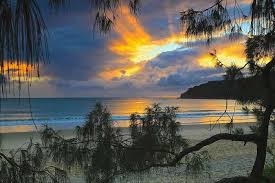

Image: 5 300 168


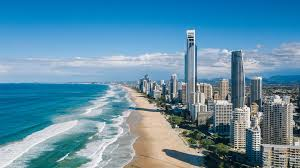

In [17]:
view_photos_and_size(flat_list, num_images=5)

Now we begin our deep learning model, For this task it might not be very hard or computer entensive. I have a RTX 3060Ti

I am going to first take the dataset we created up above and I am going to seperate things into training and test again

In [18]:
loaded_dataset = pd.read_csv(r'C:\Users\brunolopez\mldata\landscape_recognition\metadata_images\image_metadata.csv')
loaded_dataset.head()

,Unnamed: 0,size,category,url,data_type
0,0,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
1,1,"(300, 168)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
2,2,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
3,3,"(275, 183)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data
4,4,"(300, 168)",Coast,C:\Users\brunolopez\mldata\landscape_recogniti...,Training Data


A couple of helper functions, if you want to view images in the dataset

In [19]:
#Create a function that split the data into training, test, and validation. If you want to see an iamge, go ahead and pass the dataset above

def load_image_into_frame(image_metadata_csv):

    list_arrays = []

    for url in image_metadata_csv['url'].iloc[:5,]:
        open_img = cv2.imread(url)

    return open_img

    
    

Let us load our dataset using tf.data.

I'll be using a slightly different folder layout here. I am going to be using tensorflow's keras dataset loader, so I am going to put the strcuture 

Main Folder

Folder 1 - Beach
 - Image 1
 - Image 2
  - ...

Folder 2 - Forest
  - Image 1 
  - Image 2

I'll no longer be splitting up the data via test, train and validation

In [4]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\brunolopez\mldata\landscape_recognition\Landscape Classification\Landscape Classification Grouped')

Found 12000 files belonging to 5 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
batch[0].shape

(32, 256, 256, 3)

In [8]:
batch[1]

array([2, 3, 3, 4, 2, 1, 3, 2, 3, 2, 3, 2, 3, 2, 4, 4, 3, 3, 3, 3, 2, 3,
       1, 2, 3, 2, 3, 0, 3, 4, 1, 2])

Check to make sure that you have GPU's available for the training

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Now we will do some preprocessing

In [10]:
#divide all of the valuies by 255 to normalize the data 0-1

#x is the image and y is the label

data = data.map(lambda x,y: (x/255, y))

In [11]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 1

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Time to build a model. I decided to with a CNN since it is good for image classification and is less computationaly exhaustive than a DNN.

In [13]:
cnn = Sequential()

In [14]:
cnn.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(32, (3,3), 1, activation = 'relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(16, (3,3), 1, activation = 'relu'))
cnn.add(MaxPooling2D())
#flatten the model
cnn.add(Flatten())

cnn.add(Dense(256, activation = 'relu'))
cnn.add(Dense(5, activation='softmax'))


Let's use the adam optimizer and since we are predicting classes for multiple classes we will use Sparse Categorical crossentropy

In [15]:
cnn.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'] )

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Let's train the model

In [17]:
logdir = r'C:\Users\brunolopez\mldata\landscape_recognition\logs'

In [18]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

Let's enable some early stopping as well

In [36]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [19]:
hist = cnn.fit(train, epochs = 40, validation_data=val, callbacks = [tensor_callback])

Epoch 1/40


: 

: 